Kaetlyn Gibson

## Math 352 Final Exam

Instructions:  You may use the text, your notes, the internet, etc. to solve these problems, but please work alone.  In particular, please don't:
 * post any portion of the exam on the internet, 
 * discuss the problems or solutions with other students,
 * pay someone to take the test for you.
 
At various times in the past year, students have tried all of the above - it'd be super great if nobody did so this time!  

Instead, please ask me if you need help.  **in particular ask me if you're getting stuck on a problem**.  It's not unheard-of for me to make typos in the exam problems, and if there are any I want to find them as soon as I can!


## Problem 1
Generate a set of data points $(x_i,y_i)$ where
\begin{align*}
x_i &= -\frac{1}{2} + 0.01i &&(0 \leq i \leq 200) \\
y_i &= x_i^4 - x_i^2 + e_i
\end{align*}
where the e_i are independent, uniformly random errors between -0.01 and 0.01.

Using the least squares method, fit a degree-5 polynomial to this data set.  Try using both the monomials $1,x,x^2, x^3, x^4, x^5$ as the basis functions, and also try using the Chebyshev polynomials as the basis functions.  Does one produce a better fit than the other?  The textbook says that the Chebyshev polynomials should be better behaved numerically. 

---

In [160]:
# Generate x and y points
import random
import numpy as np

def xFunc(i):
    return (-0.5+0.01*i)
def yFunc(xi):
    ei = random.uniform(-0.01, 0.01)
    return xi**4 - xi**2 + ei

x_pts = []
y_pts = []
for i in range(0, 201):
    xi = xFunc(i)
    yi = yFunc(xi)
    x_pts.append(xi)
    y_pts.append(yi)

x_pts = np.array(x_pts)
y_pts = np.array(y_pts)

https://scipy-lectures.org/intro/numpy/auto_examples/plot_chebyfit.html \
https://numpy.org/doc/stable/reference/routines.polynomials.package.html#module-numpy.polynomial

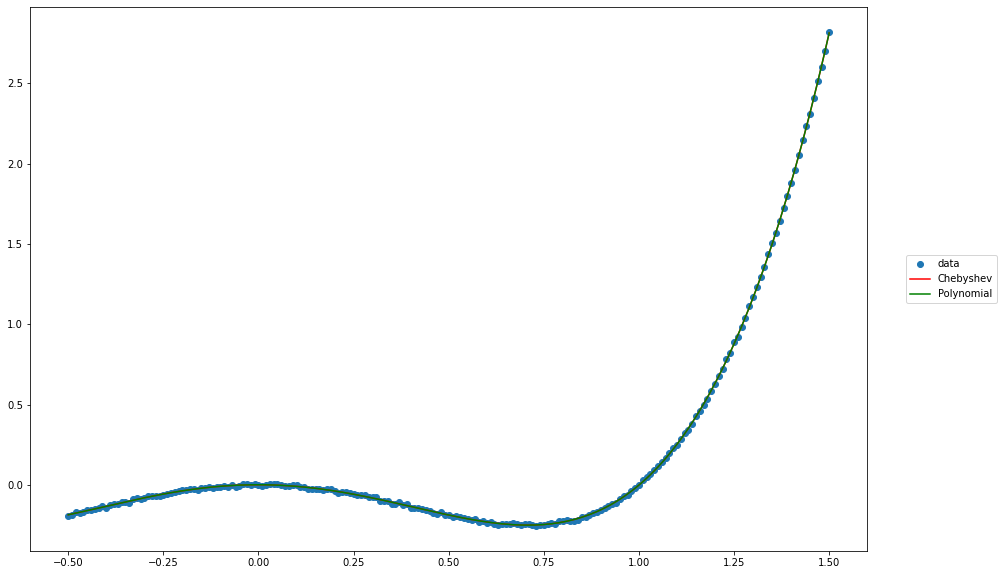

In [199]:
# least squares method, degree-5 polynomial
c = np.polynomial.Chebyshev.fit(x_pts, y_pts, 5)
c_vals = c(x_pts)
p = np.polynomial.Polynomial.fit(x_pts, y_pts, 5)
p_vals = p(x_pts)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(x_pts, y_pts, 'o', label='data')
ax.plot(x_pts, c_vals, color='red', label='Chebyshev')
ax.plot(x_pts, p_vals, color='green', label='Polynomial')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.show()

I cannot tell if one produces a better fit, but they both seem to fit the data pretty well.

## Problem 2

Let $g(x) = \cos x$, and consider the natural cubic spline $S$ which interpolates the points $(k\pi, g(k\pi))$, where $k = 0, 1, 2,3,4$.    (Obviously g(x) also interpolates these points!)

The smoothness theorem (theorem 1 in chapter 9.2) concerns what I for some reason called the "total bendiness" of a function:

$$B(f) = \int_0^{4\pi} (f''(t))^2\;dt $$

and in particular, it says that B(S) is supposed to be smaller than B(g).  Verify this fact numerically.

---

[ 0.          3.14159265  6.28318531  9.42477796 12.56637061]
[ 1. -1.  1. -1.  1.]


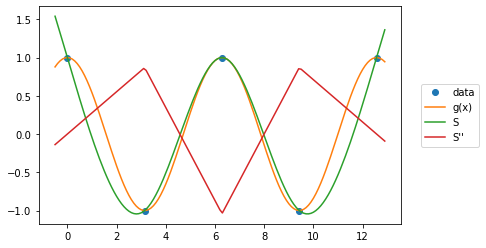

In [79]:
from numpy import pi, cos
from scipy.interpolate import CubicSpline
from scipy.integrate import quad
import matplotlib.pyplot as plt

k_vals = []
g_vals = []

for k in range(0, 5):
    k_val = k*pi
    g_val = cos(k_val)

    k_vals.append(k_val)
    g_vals.append(g_val)
    
k_vals = np.array(k_vals)
g_vals = np.array(g_vals)
print(k_vals)
print(g_vals)

S = CubicSpline(k_vals, g_vals, bc_type = "natural")

# visualize... nice
xs = np.arange(-0.5, 13, 0.1)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(k_vals, g_vals, 'o', label='data')
ax.plot(xs, np.cos(xs), label='g(x)')
ax.plot(xs, S(xs), label="S")
plt.plot(xs, S(xs, 2), label="S''")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.show()

In [73]:
# g'' = -cos(x)
def g_d2_squared(x):
    return (-cos(x))**2 

# get B(g)
quad(g_d2_squared, 0, 4*pi)

(6.283185307179586, 4.611758334327977e-09)

In [78]:
# 2nd derivative of spline
def S_d2_squared(x):
    return (S(x, 2))**2

# get B(S)
quad(S_d2_squared, 0, 4*pi)

(3.538454063528173, 3.896024649301484e-14)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html \
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

For reference: quad returns the (integral of func from a to b, estimate of the absolute error in the result).

We can now compare the bendiness between B(g) and B(S), and we can see that, indeed, B(S) < B(g): 3.538454063528173 < 6.283185307179586

## Problem 3

A complex-valued matrix $A$ is said to be *Hermitian* if $A = A^*$, where the star denotes the complex conjugate transpose:  if $A$ has entries $a_{ij}$ then $A^*$ has entries $\bar{a}_{ji}$. Hermitian matrices have real eigenvalues (for much the same reason that real symmetric matrices do). There's been quite a lot of work put into the study of random Hermitian matrices.  

**Experiment:** Generate a 100 by 100 random hermitian matrix $A=[a_{ij}]$. Then find the largest eigenvalue of $A$, using the methods we've discussed in class.

Here, a "random hermitian matrix" is a matrix with with independent, normally distributed entries. This means that:
* $a_{ii}$ is a standard normal random variable (mean zero, variance 1), and
* if $i < j$ then $a_{ij} = x + iy$, where $x$ and $y$ are standard normal random variables. 
* if $i > j$ then $a_{ij} = \bar{a}_{ji}$.

Do the above experiment 1000 times and plot a histogram of the eigenvalues you get.  

To check your answer: If all goes well, you should see a plot of the Tracy-Widom distribution $F_2$ (see Wikipedia).

Please ask me if you don't know a standard normal variable is - but the short answer is that Numpy will cheerfully sample them for you.

---

https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigvalsh.html#numpy.linalg.eigvalsh \
https://numpy.org/doc/stable/reference/generated/numpy.matrix.getH.html

In [286]:
def genHermitianMatrix(n):
    """ generate hermitian matix """
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i < j:
                x = np.random.standard_normal()
                y = np.random.standard_normal()
                A[i][j] = x + i*y
            elif i > j:
                A[i][j] = np.matrix.getH(A[j][i])
            else:
                A[i][i] = np.random.standard_normal()
    return A

In [287]:
def getLargestEigenval(m, n):
    """ 
    m = number of matrices to generate
    n = size of n x n matrix
    """
    E_vals = []
    for i in range(m):
        # generate hermitian matix
        A = genHermitianMatrix(n)
        # add a multiple of the identity matrix
        I = np.identity(n) 
        I5 = I*5
        A_I5 = np.add(A, I5)
        # get the largest eigenvalue of A
        largest_E_val = np.linalg.eigvalsh(A_I5)[-1]
        E_vals.append(largest_E_val)
    return np.array(E_vals)

In [288]:
E_vals = getLargestEigenval(1000, 100)

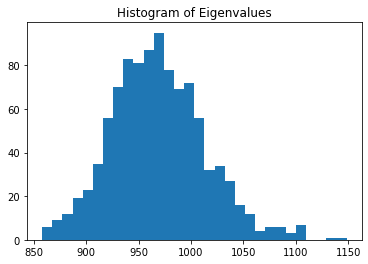

In [289]:
from matplotlib import pyplot as plt 
import numpy as np  

plt.hist(E_vals, bins = 30) 
plt.title("Histogram of Eigenvalues") 
plt.show()

I think it looks pretty good

## Problem 4

In this problem we will investigate matrices $A$ which have both good properties *and* bad properties.  Specifically, $A$ should be symmetric and positive definite (both things that we like to see in numerical analysis).  But $A$ should also be very badly conditioned: the condition number of $A$ should be at least 100.

Explain how to construct such a matrix $A$, in terms of its Cholesky decomposition.  Then, construct a 5 by 5 example of $A$, pick a vector $b$ in $\mathbb{R}^5$, and solve the system $Ax = b$.  Do small perturbations in the value of $b$ give rise to big changes in $x$, the way you'd expect for an ill-conditioned matrix?  Or does the symmetric positive definiteness of $A$ make it more well behaved?

---
If A is a real, symmetric, and positive definite matrix, then it has the unique (Cholesky) factorization A=LL<sup>T</sup>, where L is lower triangular with a positive diagonal. (Cholesky Thm from text)

"Every Hermitian positive-definite matrix (and thus also every real-valued symmetric positive-definite matrix) has a unique Cholesky decomposition" https://www.geeksforgeeks.org/cholesky-decomposition-matrix-decomposition/

We also know that the condition number is equal to the norm(A) * norm(inverse A)

So we can pull the Hermitian matrix generator from Problem 3 and try to find a badly conditioned A by checking if the condition number is at least 100. 

In [299]:
# construct matrix A
def genHermitianMatrix(n):
    """ generate hermitian matix """
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i < j:
                x = np.random.standard_normal()
                y = np.random.standard_normal()
                A[i][j] = x + i*y
            elif i > j:
                A[i][j] = np.matrix.getH(A[j][i])
            else:
                A[i][i] = np.random.standard_normal()
    return A

In [303]:
for i in range(1000):
    A = genHermitianMatrix(5)
    cond = np.linalg.cond(A)
    if cond > 100:
        print(A)
        print(f"Condition number: {cond}")
        break
    else:
        continue   

[[ 0.7081951  -1.22191156  1.04960742  0.11861399  0.64191638]
 [-1.22191156  1.06620753 -0.55149452 -2.37944835  0.15460036]
 [ 1.04960742 -0.55149452  1.0152514   0.42093409  2.59021646]
 [ 0.11861399 -2.37944835  0.42093409  0.66717556 -7.08835178]
 [ 0.64191638  0.15460036  2.59021646 -7.08835178 -0.47222017]]
Condition number: 1125.394807739919


In [329]:
#  Get vector b:
b1 = np.ones(5)
b2 = np.ones(5)
for i in range(5): 
    b2[i] += np.random.choice([0.001, -0.001])
    
x1 = np.linalg.solve(A, b1)
x2 = np.linalg.solve(A, b2)

print(f"result1: {result1}")
print(f"result2: {result2}")

result1: [ 53.62441829 -38.09704541 -80.5120961  -25.95749526   6.32051954]
result2: [ 53.67804271 -38.13514245 -80.59260819 -25.98345276   6.32684006]


I don't see very big changes in x, especially with such a large condition number (in my case it was 1125.394807739919), so it does appear that the symmetric positive definiteness of 𝐴  makes it more well behaved.

## Problem 5

Solve the following order-two initial value problem:
\begin{align*}
t^2x'' + tx' + t^2x &= 0 \\
x(0) &= 1 \\
x'(0) &= 0 \\
\end{align*}
Solve it numerically, using the order-4 Runge-Kutta method, and plot a graph of the solution.  

To check your answer: This is Bessel's equation with $a = 0$ (see Wikipedia) so when you do it right, you'll see a graph of the Bessel function $J_0$ (see Wikipedia).  Choose a step size which gives you a reasonable approximation of the Wikipedia picture.


---
Rewrite:
\begin{align*}
t^2x'' + tx' + t^2x = 0 \\
t^2x'' = - tx' - t^2x \\
x'' = -\frac{tx'}{t^2} -\frac{t^2x}{t^2} \\
x''(t) = -(\frac{1}{t}x' + x)
\end{align*}

Now we need to transform it: \
Old: x, x' \
New: x<sub>1</sub>, x<sub>2</sub> \
Initial Value: 1, 0 \
Differential Equation: x<sub>1</sub>' = x<sub>2</sub>, x<sub>2</sub>' = -($\frac{1}{t}$x<sub>2</sub> + x<sub>1</sub>)

Now 
$$X'=
\begin{bmatrix} x_2 \\ -(\frac{1}{t}x_2 + x_1)
\end{bmatrix}
$$

and **X**(0) = [1,0]<sup>T</sup>

It is now in the form \
**X'** = **F**(t, **X**) \
**X**(a) = **S**

**UPDATE:** \
x(0.1) = 0.99750156206604 \
x'(0.1) = -0.049937526036242

**X**(0.1) = [0.99750156206604,-0.049937526036242]<sup>T</sup>

Adapted from: https://stackoverflow.com/questions/52334558/runge-kutta-4th-order-method-to-solve-second-order-odes \
(needed to rename things to make sense with above work, also to make it into a function)

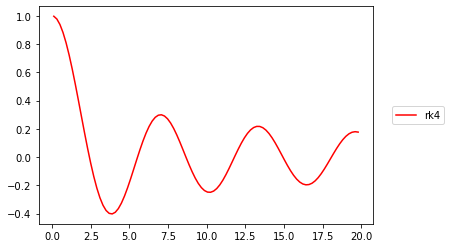

In [370]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt

def f(x1, x2, t):
    return -((1/t)*x2 + x1)

def rk4(f, n, x1, x2):
    a = 0.1
    b = 20
    h = (b-a)/n

    t_pts = np.arange(a,b,h)
    x1_pts = []
    x2_pts = []

    for t in t_pts:
        x1_pts.append(x1)
        x2_pts.append(x2)

        m1 = h*x2
        k1 = h*F(x1, x2, t)

        m2 = h*(x2 + 0.5*k1)
        k2 = h*F(x1+0.5*m1, x2+0.5*k1, t+0.5*h)

        m3 = h*(x2 + 0.5*k2)
        k3 = h*F(x1+0.5*m2, x2+0.5*k2, t+0.5*h)

        m4 = h*(x2 + k3)
        k4 = h*F(x1+m3, x2+k3, t+h)

        x1 += (m1 + 2*m2 + 2*m3 + m4)/6
        x2 += (k1 + 2*k2 + 2*k3 + k4)/6
    return t_pts, x1_pts

result = rk4(f, 100, 0.99750156206604, -0.049937526036242)
t_pts = result[0]
x1_pts = result[1]
plt.plot(t_pts, x1_pts, color = "red", label="rk4")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.show()

It looks like the picture I saw... the shape at least. 